### Import modules

In [4]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import seaborn as sns
import qrcode
import matplotlib_inline

# Plotting style
plt.style.use("ggplot")
matplotlib.rcParams["mathtext.fontset"] = "cm"
matplotlib.rcParams["font.family"] = "STIXGeneral"
# Not italized latex
matplotlib.rcParams["mathtext.default"] = "regular"
matplotlib.rcParams["font.weight"] = "light"
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

# Define study
STUDY_NAME = "opt_flathv_75_1500_withBB_chroma5_1p4_eol"

/tmp/ipykernel_2442391/2891191607.py:6: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


## Function to add QR code to plot

In [5]:
# To add QR codes to plot
def add_QR_code(fig, link):
    # Add QR code pointing to the github repository
    qr = qrcode.QRCode(
        # version=None,
        box_size=10,
        border=1,
    )
    qr.add_data(link)
    qr.make(fit=False)
    im = qr.make_image(fill_color="black", back_color="transparent")
    newax = fig.add_axes([0.9, 0.9, 0.05, 0.05], anchor="NE", zorder=1)
    newax.imshow(im, resample=False, interpolation="none", filternorm=False)
    # Add link below qrcode
    newax.plot([0, 0], [0, 0], color="white", label="link")
    text = newax.annotate(
        "lin",
        xy=(0, 300),
        xytext=(0, 300),
        fontsize=30,
        url=link,
        bbox=dict(color="white", alpha=1e-6, url=link),
        alpha=0,
    )
    # Hide X and Y axes label marks
    newax.xaxis.set_tick_params(labelbottom=False)
    newax.yaxis.set_tick_params(labelleft=False)
    # Hide X and Y axes tick marks
    newax.set_xticks([])
    newax.set_yticks([])
    newax.set_axis_off()

    return fig

### Load data

In [6]:
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

df

normalized amplitude in xy-plane      qx      qy  i_bunch_b1   
qx     qy                                                                     
62.305 60.309                             3.594  62.305  60.309      1963.0  \
       60.310                             3.594  62.305  60.310      1963.0   
       60.311                             3.875  62.305  60.311      1963.0   
       60.312                             3.906  62.305  60.312      1963.0   
       60.313                             3.875  62.305  60.313      1963.0   
...                                         ...     ...     ...         ...   
62.323 60.328                             4.469  62.323  60.328      1963.0   
       60.329                             3.844  62.323  60.329      1963.0   
62.324 60.328                             4.656  62.324  60.328      1963.0   
       60.329                             3.812  62.324  60.329      1963.0   
62.325 60.329                             4.156  62.325  60.329      1963.0   

               i_bunch_b2  
qx     qy                  
62.305 60.309      1963.0  
       60.310      1963.0  
       60.311      1963.0  
       60.312      1963.0  
       60.313      1963.0  
...                   ...  
62.323 60.328      1963.0  
       60.329      1963.0  
62.324 60.328      1963.0  
       60.329      1963.0  
62.325 60.329      1963.0  

[231 rows x 5 columns]

In [7]:
# Reshape for plotting
df_to_plot = df.pivot(index="qy", columns="qx", values="normalized amplitude in xy-plane")
df_to_plot

qx,62.305,62.306,62.307,62.308,62.309,62.310,62.311,62.312,62.313,62.314,...,62.316,62.317,62.318,62.319,62.320,62.321,62.322,62.323,62.324,62.325
qy,,,,,,,,,,,,,,,,,,,,,
60.309,3.594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.310,3.594,4.406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.311,3.875,4.719,5.312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.312,3.906,4.031,5.656,5.344,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.313,3.875,3.938,5.750,5.562,5.562,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.314,4.062,4.250,5.312,5.438,5.406,5.156,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.315,4.562,4.906,4.531,5.719,5.406,5.375,5.156,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.316,4.156,5.562,5.844,5.656,5.000,5.344,5.125,6.344,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.317,3.875,5.344,5.656,5.500,5.094,5.500,5.531,5.781,6.812,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Plot heatmap for tune-tune scan

/tmp/ipykernel_2442391/2286050787.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap("coolwarm_r", 50)


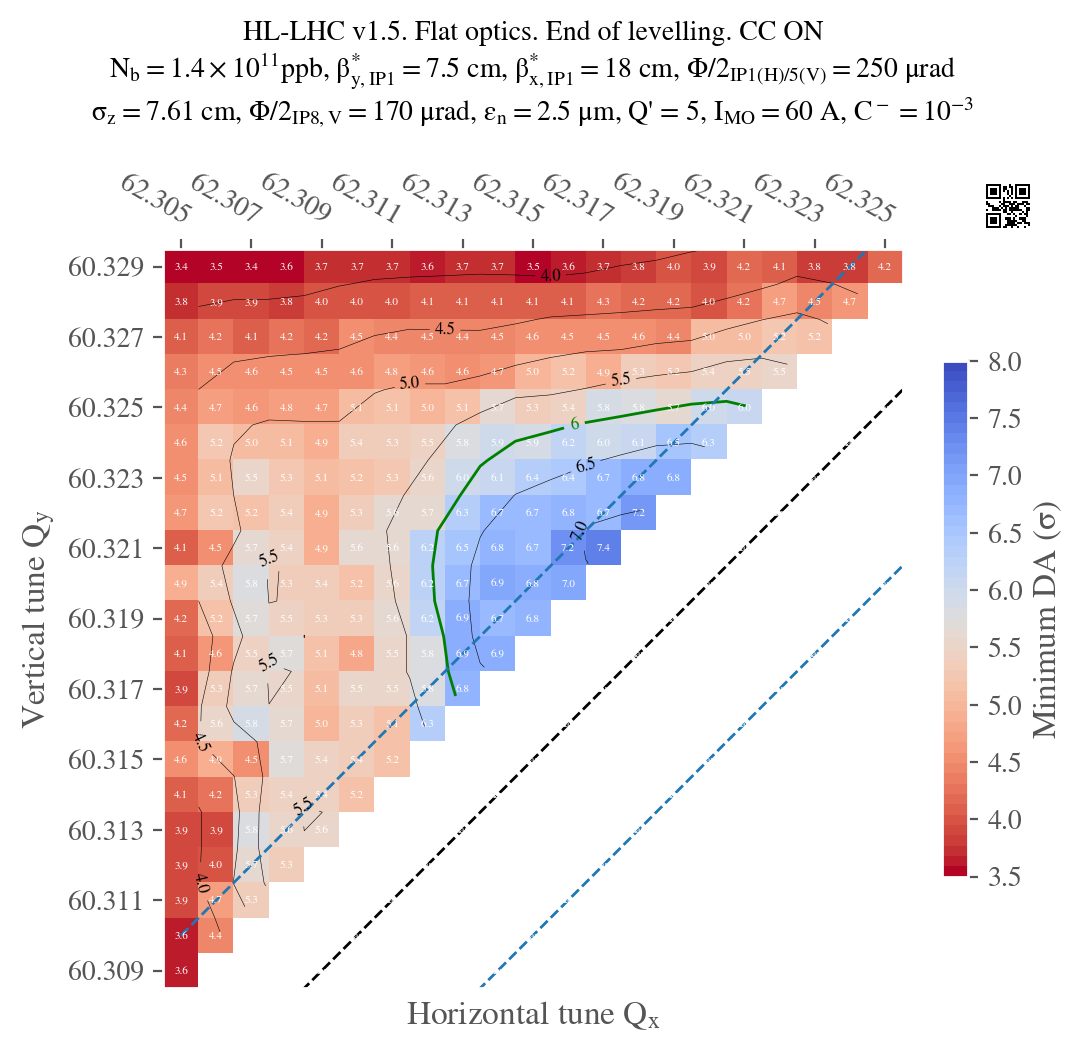

In [8]:
# Function to convert floats to scientific latex format
def latex_float(f):
    float_str = "{0:.2g}".format(f)
    if "e" in float_str:
        base, exponent = float_str.split("e")
        return r"${0} \times 10^{{{1}}}$".format(base, int(exponent))
    else:
        return float_str


def plot_heatmap(df_to_plot):
    # Get numpy array from dataframe
    data_array = df_to_plot.to_numpy()

    # Mask lower triangle
    # mask =  np.tri(data_array.shape[0], k=-1)
    # data_array = np.ma.array(data_array, mask=mask) # mask out the lower triangle
    cmap = matplotlib.cm.get_cmap("coolwarm_r", 50)
    cmap.set_bad("w")

    fig, ax = plt.subplots()
    im = ax.imshow(data_array, cmap=cmap, vmin=3.5, vmax=8)
    ax.invert_yaxis()

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(df_to_plot.columns))[::2], labels=df_to_plot.columns[::2])
    ax.set_yticks(np.arange(len(df_to_plot.index))[::2], labels=df_to_plot.index[::2])

    # Loop over data dimensions and create text annotations.
    for i in range(len(df_to_plot.index)):
        for j in range(len(df_to_plot.columns)):
            text = ax.text(
                j, i, f"{data_array[i, j]:.1f}", ha="center", va="center", color="white", fontsize=4
            )

    # Smooth data for contours
    # make the matrix symmetric by replacing the lower triangle with the upper triangle
    data_smoothed = np.copy(data_array)
    data_smoothed[np.isnan(data_array)] = 0
    data_smoothed = data_smoothed + data_smoothed.T - np.diag(data_array.diagonal())
    data_smoothed = gaussian_filter(data_smoothed, 0.7)

    # Mask the lower triangle of the smoothed matrix
    mask = np.tri(data_smoothed.shape[0], k=-1)
    mx = np.ma.masked_array(data_smoothed, mask=mask.T)
    # data_smoothed = data_array

    # Plot contours
    CSS = ax.contour(
        np.arange(0.5, data_array.shape[1]),
        np.arange(0.5, data_array.shape[0]),
        mx,
        colors="black",
        levels=list(np.arange(3, 6, 0.5)) + list(np.arange(6.5, 10, 0.5)),
        linewidths=0.2,
    )
    ax.clabel(CSS, inline=True, fontsize=6)
    CS2 = ax.contour(
        np.arange(0.5, data_array.shape[1]),
        np.arange(0.5, data_array.shape[0]),
        mx,
        colors="green",
        levels=[6],
        linewidths=1,
    )
    ax.clabel(CS2, inline=1, fontsize=6)

    # ! Diagonal lines must be plotted after the contour lines, because of bug in matplotlib
    # ! Careful, depending on how the tunes were defined, may be shifted by 1
    # Diagonal lines
    ax.plot([0, 1000], [1, 1001], color="tab:blue", linestyle="--", linewidth=1)
    ax.plot([0, 1000], [-9, 991], color="tab:blue", linestyle="--", linewidth=1)
    ax.plot([0, 1000], [-4, 996], color="black", linestyle="--", linewidth=1)

    ax.set_title(
        "HL-LHC v1.5. Flat optics. End of levelling. CC ON"
        + "\n"
        + f"$N_b = $"
        + latex_float(1.4e11)
        + "ppb, "
        + r"$\beta^{*}_{y,IP1} = 7.5$ cm"
        + ", "
        + r"$\beta^{*}_{x,IP1} = 18$ cm"
        + ", "
        + r"$\Phi/2_{IP1(H)/5(V)} = 250$ $\mu rad$"
        + "\n"
        + r"$\sigma_{z} = 7.61$ $cm$"
        + ", "
        + r"$\Phi/2_{IP8,V} = 170$ $\mu rad$"
        + ", "
        + r"$\epsilon_{n} = 2.5$ $\mu m$"
        + ", "
        + r"Q' = 5"
        + ", "
        + r"$I_{MO} = 60$ $A$"
        + ", "
        + r"$C^-=10^{-3}$"
        + "\n",
        fontsize=10,
    )
    ax.set_xlabel("Horizontal tune " + r"$Q_x$")
    ax.set_ylabel("Vertical tune " + r"$Q_y$")
    ax.set_xlim(0 - 0.5, data_array.shape[1] - 0.5)
    ax.set_ylim(0 - 0.5, data_array.shape[0] - 0.5)

    # Ticks on top
    ax.xaxis.tick_top()
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor")

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, fraction=0.026, pad=0.04)
    cbar.ax.set_ylabel("Minimum DA (" + r"$\sigma$" + ")", rotation=90, va="bottom", labelpad=15)
    plt.grid(visible=None)

    # Add QR code
    link = "TO ADD"
    fig = add_QR_code(fig, link)

    plt.savefig("plots/output_" + STUDY_NAME + ".pdf", bbox_inches="tight")
    plt.show()


plot_heatmap(df_to_plot)